Environment set up and data loading

In [4]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('default')
sns.set_palette("husl")

print("Association Rule Mining: Cassava Fertilizer Analysis")
print("="*55)
print("goal: Discover associations between fertilizers across seasons")

Association Rule Mining: Cassava Fertilizer Analysis
goal: Discover associations between fertilizers across seasons


In [5]:
# Load data from Excel file
Cassava= pd.read_excel('Cassava_Yield_Data.xlsx', sheet_name=0)

In [7]:
# Define column mappings and fertilizer codes
# Column name mappings
column_names = {
    'tillage': 'Type of tillage (conv = conventional, minimum = digger-made holes)',
    'ferT': 'Fertilizer application codes',
    'Plants_harvested': 'Number of cassava plants harvested',
    'No_bigtubers': 'Number of big tubers harvested',
    'Weigh_bigtubers': 'Weight of big tubers harvested',
    'No_mediumtubers': 'Number of medium tubers harvested',
    'Weight_mediumtubers': 'Weight of medium tubers harvested',
    'No_smalltubers': 'Number of small tubers harvested',
    'Weight_smalltubers': 'Weight of small tubers harvested',
    'Totaltuberno': 'Total number of tubers harvested',
    'AV_tubers_Plant': 'Average number of tubers per plant',
    'Total_tubweight': 'Total tube weight',
    'plotsize': 'Plot size',
    'HEC': 'Hectares',
    'TotalWeightperhectare': 'Total weight per hectare',
    'TotalTuberperHectare': 'Total tubers per hectare'
}

# Fertilizer codes explanation
fertilizer_codes = {
    'F2150': 'NPK 15:15:15 (Compound)',
    'F1100': 'NPK 17:17:17 (Compound)', 
    'F3200': 'NPK 20:10:10 (Compound)',
    'F5300': 'Nitrogen (Single-nutrient)',
    'F4250': 'Phosphorus (Single-nutrient)',
    '0': 'No fertilizer'
}

print("Fertilizer Codes:")
for code, description in fertilizer_codes.items():
    print(f"  {code}: {description}")

Fertilizer Codes:
  F2150: NPK 15:15:15 (Compound)
  F1100: NPK 17:17:17 (Compound)
  F3200: NPK 20:10:10 (Compound)
  F5300: Nitrogen (Single-nutrient)
  F4250: Phosphorus (Single-nutrient)
  0: No fertilizer


In [10]:


print("Dataset Information:")
print("="*20)
print(f"Dataset Shape: {Cassava.shape}")
print(f"Columns: {list(Cassava.columns)}")

print("\nFirst 5 rows:")
Cassava.head()

Dataset Information:
Dataset Shape: (115, 20)
Columns: ['Sesn', 'locn', 'block', 'rep', 'tillage ', 'ferT', 'Plants_harvested', 'No_bigtubers', 'Weigh_bigtubers', 'No_mediumtubers', 'Weight_mediumtubers', 'No_smalltubers', 'Weight_smalltubers', 'Totaltuberno', 'AV_tubers_Plant', 'Total_tubweight', 'plotsize', 'HEC', 'TotalWeightperhectare', 'TotalTuberperHectare']

First 5 rows:


,Sesn,locn,block,rep,tillage,ferT,Plants_harvested,No_bigtubers,Weigh_bigtubers,No_mediumtubers,Weight_mediumtubers,No_smalltubers,Weight_smalltubers,Totaltuberno,AV_tubers_Plant,Total_tubweight,plotsize,HEC,TotalWeightperhectare,TotalTuberperHectare
0,2,1,1,1,conv,F2150,28,0,0.0,61,2.5,319,4.7,380,13.571429,7.2,5.3,10000,13584.905660,716981.132075
1,2,1,1,1,conv,F1100,28,0,0.0,110,4.6,260,4.0,370,13.214286,8.6,5.3,10000,16226.415094,698113.207547
2,2,1,1,1,conv,F3200,28,2,0.2,115,5.2,319,4.4,436,15.571429,9.8,5.3,10000,18490.566038,822641.509434
3,2,1,1,1,conv,F5300,28,6,0.7,60,2.7,303,4.8,369,13.178571,8.2,5.3,10000,15471.698113,696226.415094
4,2,1,1,1,conv,F4250,28,3,0.3,82,3.4,332,4.7,417,14.892857,8.4,5.3,10000,15849.056604,786792.452830


In [11]:

print("Data info:")
print("="*15)
Cassava.info()

print("\nStatistical Summary:")
Cassava.describe()

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sesn                   115 non-null    int64  
 1   locn                   115 non-null    int64  
 2   block                  115 non-null    int64  
 3   rep                    115 non-null    int64  
 4   tillage                115 non-null    object 
 5   ferT                   115 non-null    object 
 6   Plants_harvested       115 non-null    int64  
 7   No_bigtubers           115 non-null    int64  
 8   Weigh_bigtubers        115 non-null    float64
 9   No_mediumtubers        115 non-null    int64  
 10  Weight_mediumtubers    115 non-null    float64
 11  No_smalltubers         115 non-null    int64  
 12  Weight_smalltubers     115 non-null    float64
 13  Totaltuberno           115 non-null    int64  
 14  AV_tubers_Plant        115 non-null    float64


,Sesn,locn,block,rep,Plants_harvested,No_bigtubers,Weigh_bigtubers,No_mediumtubers,Weight_mediumtubers,No_smalltubers,Weight_smalltubers,Totaltuberno,AV_tubers_Plant,Total_tubweight,plotsize,HEC,TotalWeightperhectare,TotalTuberperHectare
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.0,115.000000,115.000000
mean,1.521739,1.521739,2.043478,2.043478,18.565217,4.000000,0.614783,49.521739,2.771304,146.252174,2.511304,199.773913,10.525355,5.897391,4.486957,10000.0,13094.339623,431822.336810
std,0.501713,0.501713,0.809931,0.809931,6.442908,7.367544,1.174678,29.920757,1.774911,87.351663,1.303354,102.555168,3.248495,3.040702,0.485134,0.0,6896.716668,184839.313619
min,1.000000,1.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.500000,57.000000,3.800000,1.000000,4.200000,10000.0,2380.952381,135714.285714
25%,1.000000,1.000000,1.000000,1.000000,14.000000,0.000000,0.000000,26.500000,1.300000,84.000000,1.500000,115.500000,8.027778,3.400000,4.200000,10000.0,8095.238095,275000.000000
50%,2.000000,2.000000,2.000000,2.000000,18.000000,0.000000,0.000000,44.000000,2.500000,109.000000,2.100000,179.000000,10.666667,6.000000,4.200000,10000.0,11904.761905,419047.619048
75%,2.000000,2.000000,3.000000,3.000000,28.000000,5.500000,0.700000,65.500000,3.950000,221.000000,3.600000,273.500000,12.973684,8.150000,5.300000,10000.0,16421.832884,589285.714286
max,2.000000,2.000000,3.000000,3.000000,28.000000,41.000000,7.000000,126.000000,8.100000,376.000000,5.400000,443.000000,19.200000,14.100000,5.300000,10000.0,33571.428571,835849.056604


Fertilizer Analysis:
Unique fertilizer codes:
['F2150' 'F1100' 'F3200' 'F5300' 'F4250']

Fertilizer distribution:
ferT
F2150    23
F1100    23
F3200    23
F5300    23
F4250    23
Name: count, dtype: int64


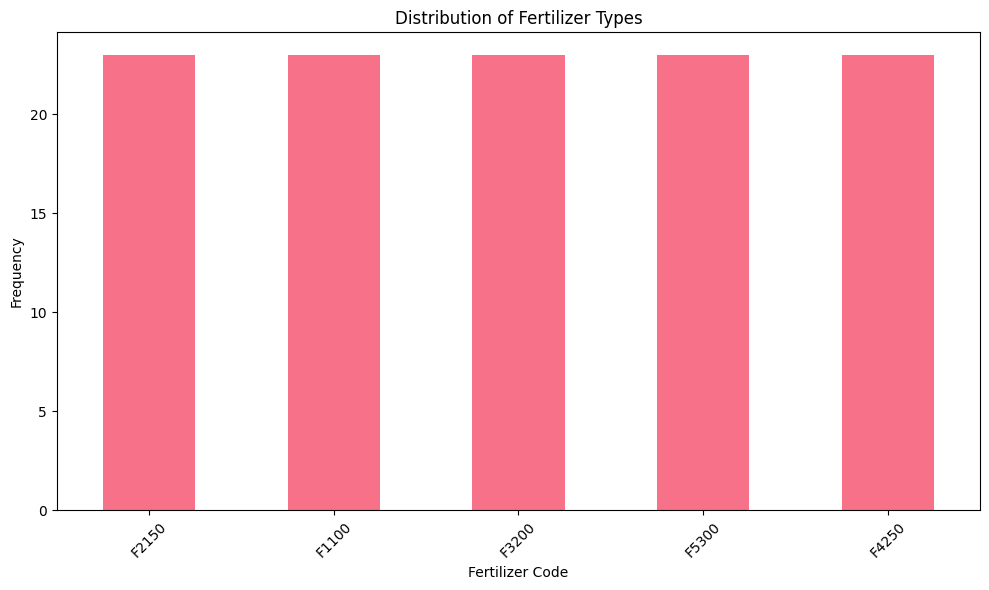

In [12]:
# Examine fertilizer distribution
print("Fertilizer Analysis:")
print("="*18)

# Check unique fertilizer values
if 'ferT' in Cassava.columns:
    print("Unique fertilizer codes:")
    print(Cassava['ferT'].unique())
    
    print("\nFertilizer distribution:")
    fert_counts = Cassava['ferT'].value_counts()
    print(fert_counts)
    
    # Visualize fertilizer distribution
    plt.figure(figsize=(10, 6))
    fert_counts.plot(kind='bar')
    plt.title('Distribution of Fertilizer Types')
    plt.xlabel('Fertilizer Code')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Fertilizer column 'ferT' not found in dataset")
    print("Available columns:", Cassava.columns.tolist())

Data preparation for Association Rule Mining

In [14]:
# Create season variable 

print("Season Creation and Data Preparation:")
print("="*38)

Cassava_processed = Cassava.copy()

# Method 1: Create seasons based on row index (assuming chronological order)
rows_per_season = len(Cassava) // 4  # Divide into 4 seasons
Cassava_processed['season'] = pd.cut(Cassava_processed.index, 
                               bins=4, 
                               labels=['Season_1', 'Season_2', 'Season_3', 'Season_4'])

print(f"Created seasons based on data chronology:")
print(Cassava_processed['season'].value_counts())

# Alternative Method 2: Create seasons based on yield patterns (if preferred)
# df_processed['season'] = pd.qcut(df_processed['TotalWeightperhectare'], 
#                                 q=4, 
#                                 labels=['Low_Season', 'Med_Low_Season', 'Med_High_Season', 'High_Season'])

Season Creation and Data Preparation:
Created seasons based on data chronology:
season
Season_1    29
Season_2    29
Season_4    29
Season_3    28
Name: count, dtype: int64


In [15]:
print(Cassava.columns.tolist())

['Sesn', 'locn', 'block', 'rep', 'tillage ', 'ferT', 'Plants_harvested', 'No_bigtubers', 'Weigh_bigtubers', 'No_mediumtubers', 'Weight_mediumtubers', 'No_smalltubers', 'Weight_smalltubers', 'Totaltuberno', 'AV_tubers_Plant', 'Total_tubweight', 'plotsize', 'HEC', 'TotalWeightperhectare', 'TotalTuberperHectare']


In [16]:
# Cell 7: Prepare transaction data for association rule mining
print("Transaction Data Preparation:")
print("="*30)

# Create transactions where each row represents fertilizer usage in a season
transactions = []

# Group by season and create fertilizer combinations
for season in Cassava_processed['season'].unique():
    season_data = df_processed[Cassava_processed['season'] == season]
    
    for _, row in season_data.iterrows():
        transaction = []
        
        # Add fertilizer type
        if pd.notna(row['ferT']):
            fert_code = str(row['ferT'])
            fert_name = fertilizer_codes.get(fert_code, f'Unknown_{fert_code}')
            transaction.append(f"Fertilizer_{fert_name}")
        
        # Add tillage type
        if pd.notna(row['tillage ']):
            transaction.append(f"Tillage_{row['tillage ']}")
        
        # Add yield category based on performance
        yield_per_ha = row['TotalWeightperhectare']
        if yield_per_ha > Cassava_processed['TotalWeightperhectare'].quantile(0.75):
            transaction.append('High_Yield')
        elif yield_per_ha > Cassava_processed['TotalWeightperhectare'].quantile(0.5):
            transaction.append('Medium_Yield')
        else:
            transaction.append('Low_Yield')
        
        # Add season
        transaction.append(f"Season_{season}")
        
        if transaction:  # Only add non-empty transactions
            transactions.append(transaction)

print(f"Created {len(transactions)} transactions")
print("Sample transactions:")
for i, trans in enumerate(transactions[:5]):
    print(f"  Transaction {i+1}: {trans}")

Transaction Data Preparation:
Created 115 transactions
Sample transactions:
  Transaction 1: ['Fertilizer_NPK 15:15:15 (Compound)', 'Tillage_conv', 'Medium_Yield', 'Season_Season_1']
  Transaction 2: ['Fertilizer_NPK 17:17:17 (Compound)', 'Tillage_conv', 'Medium_Yield', 'Season_Season_1']
  Transaction 3: ['Fertilizer_NPK 20:10:10 (Compound)', 'Tillage_conv', 'High_Yield', 'Season_Season_1']
  Transaction 4: ['Fertilizer_Nitrogen (Single-nutrient)', 'Tillage_conv', 'Medium_Yield', 'Season_Season_1']
  Transaction 5: ['Fertilizer_Phosphorus (Single-nutrient)', 'Tillage_conv', 'Medium_Yield', 'Season_Season_1']


In [18]:
# Transform data for association rule mining
print("Data Transformation for ARM:")
print("="*28)

# Use TransactionEncoder to convert transactions to binary matrix
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
Cassava_encoded = pd.DataFrame(te_ary, columns=te.columns_)

print(f"Encoded data shape: {Cassava_encoded.shape}")
print(f"Items available for mining: {len(te.columns_)}")

print("\nItems in the dataset:")
for i, item in enumerate(te.columns_):
    print(f"  {i+1}. {item}")

print(f"\nSample of encoded data:")
Cassava_encoded.head()

Data Transformation for ARM:
Encoded data shape: (115, 14)
Items available for mining: 14

Items in the dataset:
  1. Fertilizer_NPK 15:15:15 (Compound)
  2. Fertilizer_NPK 17:17:17 (Compound)
  3. Fertilizer_NPK 20:10:10 (Compound)
  4. Fertilizer_Nitrogen (Single-nutrient)
  5. Fertilizer_Phosphorus (Single-nutrient)
  6. High_Yield
  7. Low_Yield
  8. Medium_Yield
  9. Season_Season_1
  10. Season_Season_2
  11. Season_Season_3
  12. Season_Season_4
  13. Tillage_conv
  14. Tillage_minimum

Sample of encoded data:


,Fertilizer_NPK 15:15:15 (Compound),Fertilizer_NPK 17:17:17 (Compound),Fertilizer_NPK 20:10:10 (Compound),Fertilizer_Nitrogen (Single-nutrient),Fertilizer_Phosphorus (Single-nutrient),High_Yield,Low_Yield,Medium_Yield,Season_Season_1,Season_Season_2,Season_Season_3,Season_Season_4,Tillage_conv,Tillage_minimum
0,True,False,False,False,False,False,False,True,True,False,False,False,True,False
1,False,True,False,False,False,False,False,True,True,False,False,False,True,False
2,False,False,True,False,False,True,False,False,True,False,False,False,True,False
3,False,False,False,True,False,False,False,True,True,False,False,False,True,False
4,False,False,False,False,True,False,False,True,True,False,False,False,True,False


Association Rule mining

In [ ]:
#Generate frequent itemsets
print("Frequent Itemset Mining:")
print("="*24)

# Find frequent itemsets using Apriori algorithm
min_support = 0.1  # Adjust based on your data size and requirements

frequent_itemsets = apriori(Cassava_encoded, 
                           min_support=min_support, 
                           use_colnames=True, 
                           verbose=1)

print(f"\nFound {len(frequent_itemsets)} frequent itemsets with min_support = {min_support}")

if len(frequent_itemsets) > 0:
    # Sort by support
    frequent_itemsets_sorted = frequent_itemsets.sort_values('support', ascending=False)
    print("\nTop 10 frequent itemsets:")
    print(frequent_itemsets_sorted.head(10))
else:
    print("No frequent itemsets found. Trying with lower minimum support...")
    min_support = 0.05
    frequent_itemsets = apriori(Cassava_encoded, 
                               min_support=min_support, 
                               use_colnames=True, 
                               verbose=1)
    print(f"Found {len(frequent_itemsets)} frequent itemsets with min_support = {min_support}")

Frequent Itemset Mining:
Processing 8 combinations | Sampling itemset size 4 3

Found 42 frequent itemsets with min_support = 0.1

Top 10 frequent itemsets:
     support                      itemsets
12  0.521739                (Tillage_conv)
6   0.504348                   (Low_Yield)
13  0.478261             (Tillage_minimum)
29  0.260870  (Low_Yield, Tillage_minimum)
8   0.252174             (Season_Season_1)
5   0.252174                  (High_Yield)
11  0.252174             (Season_Season_4)
9   0.252174             (Season_Season_2)
7   0.243478                (Medium_Yield)
27  0.243478  (Season_Season_4, Low_Yield)


In [20]:

print("Association Rule Generation:")
print("="*27)

if len(frequent_itemsets) > 0:
    # Generate association rules
    rules = association_rules(frequent_itemsets, 
                             metric="confidence", 
                             min_threshold=0.5)
    
    print(f"Generated {len(rules)} association rules")
    
    if len(rules) > 0:
        # Sort rules by confidence and lift
        rules_sorted = rules.sort_values(['confidence', 'lift'], ascending=[False, False])
        
        print("\nTop 10 Association Rules:")
        print("="*25)
        
        # Display rules in a readable format
        for idx, rule in rules_sorted.head(10).iterrows():
            antecedent = ', '.join(list(rule['antecedents']))
            consequent = ', '.join(list(rule['consequents']))
            
            print(f"\nRule {idx + 1}:")
            print(f"  If: {antecedent}")
            print(f"  Then: {consequent}")
            print(f"  Support: {rule['support']:.3f}")
            print(f"  Confidence: {rule['confidence']:.3f}")
            print(f"  Lift: {rule['lift']:.3f}")
    else:
        print("No association rules found with current thresholds")
else:
    print("Cannot generate rules - no frequent itemsets found")

Association Rule Generation:
Generated 28 association rules

Top 10 Association Rules:

Rule 25:
  If: Season_Season_4, Tillage_minimum
  Then: Low_Yield
  Support: 0.122
  Confidence: 1.000
  Lift: 1.983

Rule 11:
  If: Season_Season_4
  Then: Low_Yield
  Support: 0.243
  Confidence: 0.966
  Lift: 1.914

Rule 21:
  If: Tillage_conv, Season_Season_4
  Then: Low_Yield
  Support: 0.122
  Confidence: 0.933
  Lift: 1.851

Rule 27:
  If: Tillage_conv, Season_Season_1
  Then: Medium_Yield
  Support: 0.113
  Confidence: 0.867
  Lift: 3.560

Rule 14:
  If: Medium_Yield
  Then: Season_Season_1
  Support: 0.191
  Confidence: 0.786
  Lift: 3.116

Rule 26:
  If: Tillage_conv, Medium_Yield
  Then: Season_Season_1
  Support: 0.113
  Confidence: 0.765
  Lift: 3.032

Rule 15:
  If: Season_Season_1
  Then: Medium_Yield
  Support: 0.191
  Confidence: 0.759
  Lift: 3.116

Rule 1:
  If: Fertilizer_NPK 15:15:15 (Compound)
  Then: Low_Yield
  Support: 0.130
  Confidence: 0.652
  Lift: 1.293

Rule 3:
  If: F

Fertilizer-Specific Analysis

In [22]:
#Filter rules for fertilizer associations
print("Fertilizer-Specific Association Analysis:")
print("="*40)

if len(rules) > 0:
    # Filter rules that involve fertilizers
    fertilizer_rules = rules[
        rules['antecedents'].astype(str).str.contains('Fertilizer_') |
        rules['consequents'].astype(str).str.contains('Fertilizer_')
    ]
    
    print(f"Found {len(fertilizer_rules)} rules involving fertilizers")
    
    if len(fertilizer_rules) > 0:
        print("\nFertilizer Association Rules:")
        print("="*30)
        
        for idx, rule in fertilizer_rules.iterrows():
            antecedent = ', '.join(list(rule['antecedents']))
            consequent = ', '.join(list(rule['consequents']))
            
            print(f"\nRule {idx + 1}:")
            print(f"  If: {antecedent}")
            print(f"  Then: {consequent}")
            print(f"  Support: {rule['support']:.3f}")
            print(f"  Confidence: {rule['confidence']:.3f}")
            print(f"  Lift: {rule['lift']:.3f}")
            
            # Interpret the rule
            if rule['lift'] > 1:
                print(f" Positive association (Lift > 1)")
            else:
                print(f"Negative association (Lift < 1)")
    else:
        print("No specific fertilizer association rules found")

Fertilizer-Specific Association Analysis:
Found 7 rules involving fertilizers

Fertilizer Association Rules:

Rule 1:
  If: Fertilizer_NPK 15:15:15 (Compound)
  Then: Low_Yield
  Support: 0.130
  Confidence: 0.652
  Lift: 1.293
 Positive association (Lift > 1)

Rule 2:
  If: Fertilizer_NPK 15:15:15 (Compound)
  Then: Tillage_conv
  Support: 0.104
  Confidence: 0.522
  Lift: 1.000
Negative association (Lift < 1)

Rule 3:
  If: Fertilizer_NPK 17:17:17 (Compound)
  Then: Low_Yield
  Support: 0.130
  Confidence: 0.652
  Lift: 1.293
 Positive association (Lift > 1)

Rule 4:
  If: Fertilizer_NPK 17:17:17 (Compound)
  Then: Tillage_conv
  Support: 0.104
  Confidence: 0.522
  Lift: 1.000
Negative association (Lift < 1)

Rule 5:
  If: Fertilizer_NPK 20:10:10 (Compound)
  Then: Tillage_conv
  Support: 0.104
  Confidence: 0.522
  Lift: 1.000
Negative association (Lift < 1)

Rule 6:
  If: Fertilizer_Nitrogen (Single-nutrient)
  Then: Tillage_conv
  Support: 0.104
  Confidence: 0.522
  Lift: 1.000


In [25]:

print("Season-Based Fertilizer Analysis:")
print("="*33)

# Analyze fertilizer patterns across seasons
season_fertilizer_analysis = []

for season in Cassava_processed['season'].unique():
    season_data = Cassava_processed[Cassava_processed['season'] == season]
    
    season_analysis = {
        'season': season,
        'total_plots': len(season_data),
        'fertilizer_distribution': season_data['ferT'].value_counts().to_dict(),
        'avg_yield': season_data['TotalWeightperhectare'].mean(),
        'avg_tubers_per_hectare': season_data['TotalTuberperHectare'].mean()
    }
    
    season_fertilizer_analysis.append(season_analysis)

# Display analysis
for analysis in season_fertilizer_analysis:
    print(f"\n{analysis['season']}:")
    print(f"  Total plots: {analysis['total_plots']}")
    print(f"  Average yield per hectare: {analysis['avg_yield']:.2f}")
    print(f"  Average tubers per hectare: {analysis['avg_tubers_per_hectare']:.2f}")
    print("  Fertilizer distribution:")
    for fert, count in analysis['fertilizer_distribution'].items():
        fert_name = fertilizer_codes.get(str(fert), f'Unknown_{fert}')
        print(f"    {fert} ({fert_name}): {count} plots")

Season-Based Fertilizer Analysis:

Season_1:
  Total plots: 29
  Average yield per hectare: 13994.80
  Average tubers per hectare: 644697.46
  Fertilizer distribution:
    F2150 (NPK 15:15:15 (Compound)): 6 plots
    F3200 (NPK 20:10:10 (Compound)): 6 plots
    F5300 (Nitrogen (Single-nutrient)): 6 plots
    F4250 (Phosphorus (Single-nutrient)): 6 plots
    F1100 (NPK 17:17:17 (Compound)): 5 plots

Season_2:
  Total plots: 29
  Average yield per hectare: 17290.64
  Average tubers per hectare: 467865.66
  Fertilizer distribution:
    F1100 (NPK 17:17:17 (Compound)): 7 plots
    F3200 (NPK 20:10:10 (Compound)): 6 plots
    F2150 (NPK 15:15:15 (Compound)): 6 plots
    F4250 (Phosphorus (Single-nutrient)): 5 plots
    F5300 (Nitrogen (Single-nutrient)): 5 plots

Season_3:
  Total plots: 28
  Average yield per hectare: 14090.14
  Average tubers per hectare: 311479.59
  Fertilizer distribution:
    F4250 (Phosphorus (Single-nutrient)): 6 plots
    F5300 (Nitrogen (Single-nutrient)): 6 plots


Visualization and Insights

Association Rules Visualization:


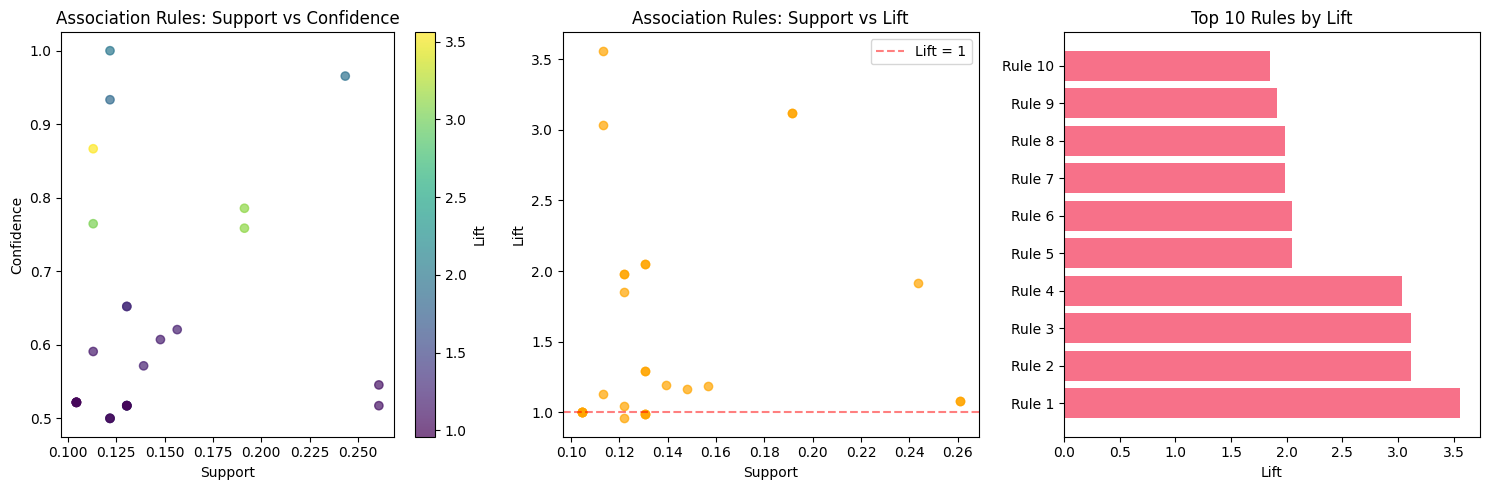

In [ ]:

print("Association Rules Visualization:")
print("="*30)

if len(rules) > 0:
    # Create scatter plot of support vs confidence
    plt.figure(figsize=(15, 5))
    
    # Subplot 1: Support vs Confidence
    plt.subplot(1, 3, 1)
    plt.scatter(rules['support'], rules['confidence'], 
               c=rules['lift'], cmap='viridis', alpha=0.7)
    plt.colorbar(label='Lift')
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.title('Association Rules: Support vs Confidence')
    
    # Subplot 2: Support vs Lift
    plt.subplot(1, 3, 2)
    plt.scatter(rules['support'], rules['lift'], alpha=0.7, color='orange')
    plt.xlabel('Support')
    plt.ylabel('Lift')
    plt.title('Association Rules: Support vs Lift')
    plt.axhline(y=1, color='red', linestyle='--', alpha=0.5, label='Lift = 1')
    plt.legend()
    
    # Subplot 3: Top rules by lift
    plt.subplot(1, 3, 3)
    top_rules = rules.nlargest(10, 'lift')
    rule_labels = [f"Rule {i+1}" for i in range(len(top_rules))]
    plt.barh(rule_labels, top_rules['lift'])
    plt.xlabel('Lift')
    plt.title('Top 10 Rules by Lift')
    
    plt.tight_layout()
    plt.show()
else:
    print("No rules to visualize")

Fertilizer Performance Analysis:


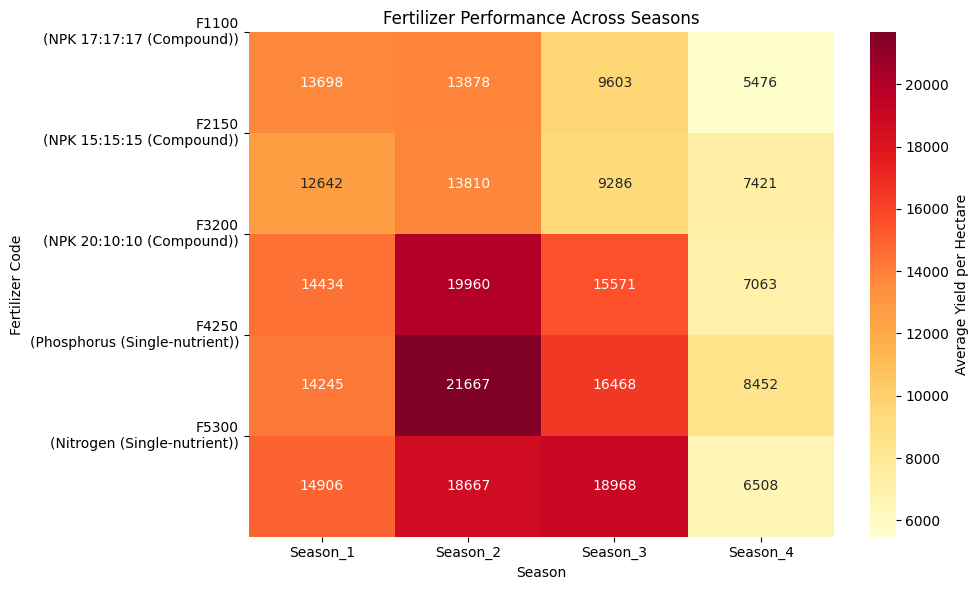


Fertilizer Performance Summary:
season      Season_1      Season_2      Season_3     Season_4
ferT                                                         
F1100   13698.113208  13877.551020   9603.174603  5476.190476
F2150   12641.509434  13809.523810   9285.714286  7420.634921
F3200   14433.962264  19960.317460  15571.428571  7063.492063
F4250   14245.283019  21666.666667  16468.253968  8452.380952
F5300   14905.660377  18666.666667  18968.253968  6507.936508


In [28]:
#Fertilizer performance heatmap
print("Fertilizer Performance Analysis:")
print("="*31)

# Create a heatmap showing fertilizer performance across seasons
if 'ferT' in Cassava_processed.columns:
    # Create pivot table
    performance_matrix = Cassava_processed.pivot_table(
        index='ferT', 
        columns='season', 
        values='TotalWeightperhectare', 
        aggfunc='mean'
    )
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(performance_matrix, 
                annot=True, 
                cmap='YlOrRd', 
                fmt='.0f',
                cbar_kws={'label': 'Average Yield per Hectare'})
    plt.title('Fertilizer Performance Across Seasons')
    plt.xlabel('Season')
    plt.ylabel('Fertilizer Code')
    
    # Add fertilizer descriptions as y-tick labels
    y_labels = [f"{code}\n({fertilizer_codes.get(str(code), 'Unknown')})" 
                for code in performance_matrix.index]
    plt.yticks(range(len(y_labels)), y_labels, rotation=0)
    
    plt.tight_layout()
    plt.show()
    
    print("\nFertilizer Performance Summary:")
    print(performance_matrix)

In [30]:
# Cross-season fertilizer transition analysis
print("Cross-Season Fertilizer Transition Analysis:")
print("="*43)

# Analyze how fertilizer usage transitions between seasons
# This assumes we have sequential data or farmer tracking

# Create transition matrix (if we have farmer/plot identifiers)
# For now, we'll analyze general patterns

transition_analysis = {}
seasons = sorted(Cassava_processed['season'].unique())

for i in range(len(seasons)-1):
    current_season = seasons[i]
    next_season = seasons[i+1]
    
    current_fertilizers = Cassava_processed[Cassava_processed['season'] == current_season]['ferT'].value_counts()
    next_fertilizers = Cassava_processed[Cassava_processed['season'] == next_season]['ferT'].value_counts()
    
    transition_analysis[f"{current_season}_to_{next_season}"] = {
        'current': current_fertilizers.to_dict(),
        'next': next_fertilizers.to_dict()
    }

print("Fertilizer usage transitions between seasons:")
for transition, data in transition_analysis.items():
    print(f"\n{transition}:")
    print(f"  Current season fertilizers: {data['current']}")
    print(f"  Next season fertilizers: {data['next']}")

Cross-Season Fertilizer Transition Analysis:
Fertilizer usage transitions between seasons:

Season_1_to_Season_2:
  Current season fertilizers: {'F2150': 6, 'F3200': 6, 'F5300': 6, 'F4250': 6, 'F1100': 5}
  Next season fertilizers: {'F1100': 7, 'F3200': 6, 'F2150': 6, 'F4250': 5, 'F5300': 5}

Season_2_to_Season_3:
  Current season fertilizers: {'F1100': 7, 'F3200': 6, 'F2150': 6, 'F4250': 5, 'F5300': 5}
  Next season fertilizers: {'F4250': 6, 'F5300': 6, 'F1100': 6, 'F3200': 5, 'F2150': 5}

Season_3_to_Season_4:
  Current season fertilizers: {'F4250': 6, 'F5300': 6, 'F1100': 6, 'F3200': 5, 'F2150': 5}
  Next season fertilizers: {'F5300': 6, 'F4250': 6, 'F3200': 6, 'F2150': 6, 'F1100': 5}


Insights and Recommendations

In [31]:
#Generate insights and recommendations
print("ASSOCIATION RULE MINING INSIGHTS AND RECOMMENDATIONS")
print("="*55)

print("\n DATASET SUMMARY:")
print(f"  • Total observations: {len(Cassava_processed)}")
print(f"  • Seasons analyzed: {len(Cassava_processed['season'].unique())}")
print(f"  • Fertilizer types: {len(Cassava_processed['ferT'].unique())}")
print(f"  • Transactions created: {len(transactions)}")

print(f"\n ASSOCIATION RULE MINING RESULTS:")
if len(frequent_itemsets) > 0:
    print(f"  • Frequent itemsets found: {len(frequent_itemsets)}")
    print(f"  • Association rules generated: {len(rules) if len(rules) > 0 else 0}")
    print(f"  • Minimum support threshold: {min_support}")
else:
    print("  • No frequent itemsets found - consider lowering support threshold")

if len(rules) > 0:
    print(f"\n TOP ASSOCIATIONS:")
    top_3_rules = rules.nlargest(3, 'confidence')
    for idx, rule in top_3_rules.iterrows():
        antecedent = ', '.join(list(rule['antecedents']))
        consequent = ', '.join(list(rule['consequents']))
        print(f"  • {antecedent} → {consequent}")
        print(f"    Confidence: {rule['confidence']:.3f}, Lift: {rule['lift']:.3f}")

print(f"\n FERTILIZER PERFORMANCE INSIGHTS:")
best_performing_season = Cassava_processed.groupby('season')['TotalWeightperhectare'].mean().idxmax()
best_yield = Cassava_processed.groupby('season')['TotalWeightperhectare'].mean().max()
print(f"  • Best performing season: {best_performing_season} ({best_yield:.0f} kg/ha)")

most_common_fertilizer = Cassava_processed['ferT'].mode().iloc[0] if len(Cassava_processed['ferT'].mode()) > 0 else 'Unknown'
fert_name = fertilizer_codes.get(str(most_common_fertilizer), 'Unknown')
print(f"  • Most commonly used fertilizer: {most_common_fertilizer} ({fert_name})")




ASSOCIATION RULE MINING INSIGHTS AND RECOMMENDATIONS

 DATASET SUMMARY:
  • Total observations: 115
  • Seasons analyzed: 4
  • Fertilizer types: 5
  • Transactions created: 115

 ASSOCIATION RULE MINING RESULTS:
  • Frequent itemsets found: 42
  • Association rules generated: 28
  • Minimum support threshold: 0.1

 TOP ASSOCIATIONS:
  • Season_Season_4, Tillage_minimum → Low_Yield
    Confidence: 1.000, Lift: 1.983
  • Season_Season_4 → Low_Yield
    Confidence: 0.966, Lift: 1.914
  • Tillage_conv, Season_Season_4 → Low_Yield
    Confidence: 0.933, Lift: 1.851

 FERTILIZER PERFORMANCE INSIGHTS:
  • Best performing season: Season_2 (17291 kg/ha)
  • Most commonly used fertilizer: F1100 (NPK 17:17:17 (Compound))
